# <span class="bg-primary">11. ANALYSE EXPLORATOIRE DES DONNEES</span>

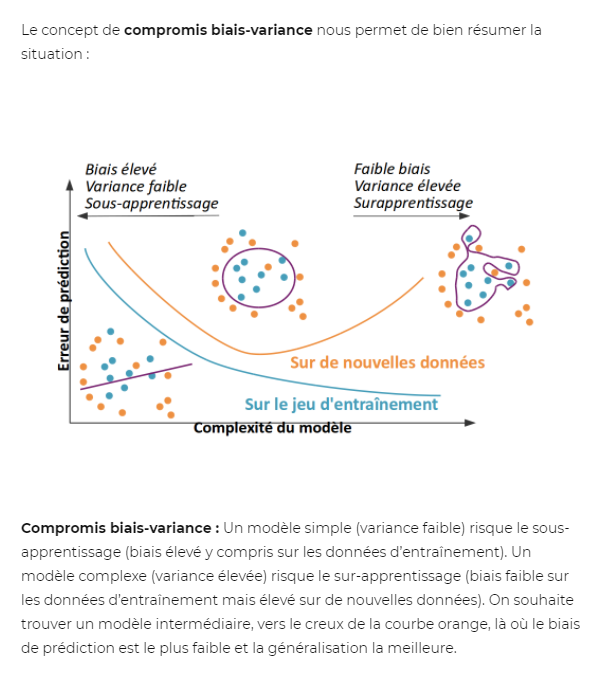

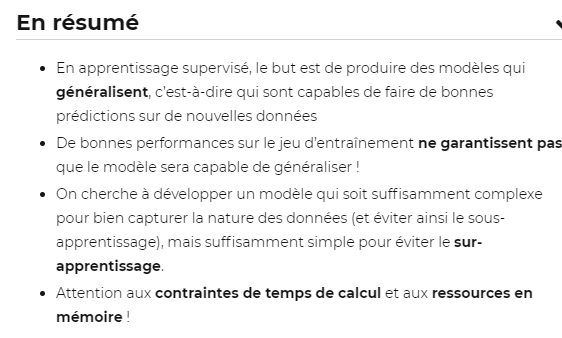

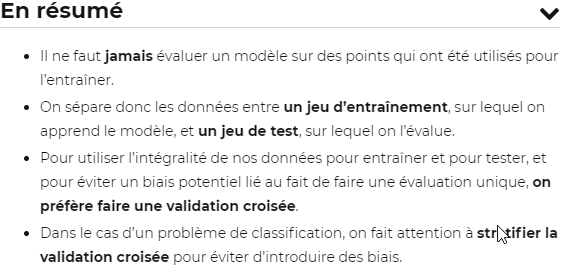

In [1]:
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-12-EVALUER_PERFORMANCES_MODELE_ML')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

# <span class="bg-info">LES DONNEES</span>

In [3]:
data = pd.read_csv('wine.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# valeurs de travail
X = data[data.columns[:-1]].values
y = data['quality'].values

In [6]:
X.shape

(1599, 11)

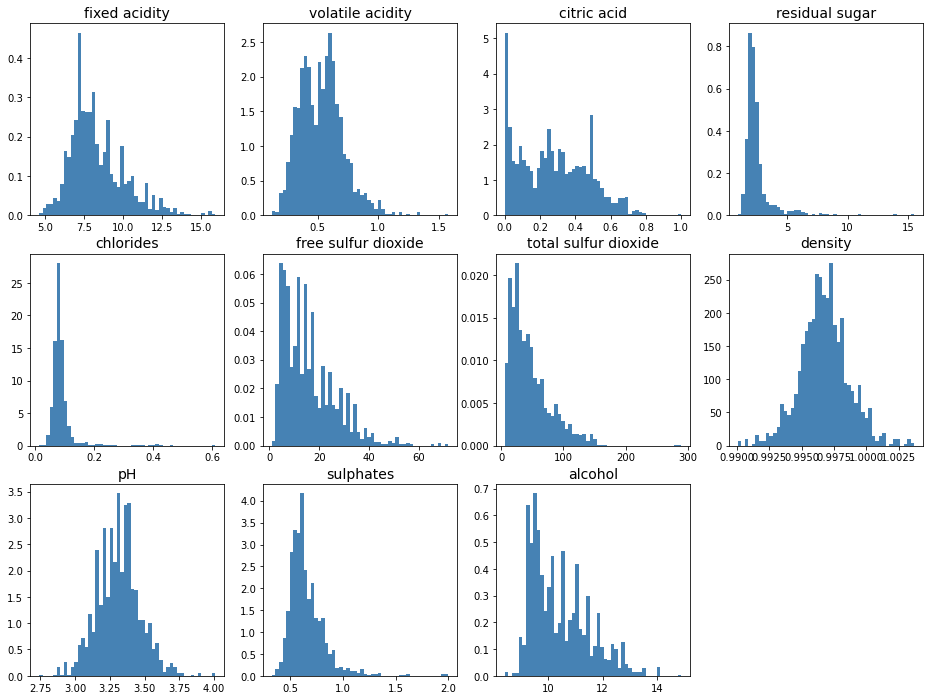

In [7]:
# histogramme des variables de X
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


In [8]:
# comme les unités ne sont pas les mêmes de 0  1 et de 0 et 300 
# donc il faut standardiser pour que les valeurs très grandes ne prennent
# pas le pas sur les très petites

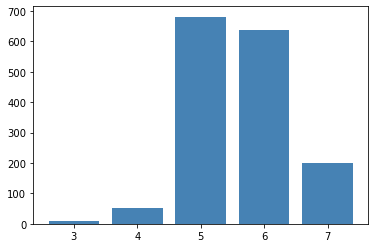

In [9]:
# Observation de la target y
absc = range(np.min(y), np.max(y))
b = plt.bar(absc, [(y ==a).sum() for a in absc], color='steelblue')

In [10]:
# valeurs comprises entre 3 et 7 avec un pic à 5

# <span class="bg-info">SELECTION DE MODELE</span>

In [12]:
# problème : séparer les bons vins, des mauvais
y_class = np.where(y<6, 0, 1) # 0 si <6 et 1 bon vin autrement
y_class

array([0, 0, 0, ..., 1, 0, 1])

In [13]:
# nombre d'échantillon >= 6 bons vins
y_class[y_class == 1].shape

(855,)

In [14]:
# nombre d'échantillon < 7 vins médiocres
y_class[y_class == 0].shape

(744,)

In [15]:
# KNN combien de voisins il faut prendre?

In [16]:
# split du jeu de données en TRAIN SET et TEST SET
# 30% des données dans le jeu de test)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class,
                                                                    test_size=0.3) 


In [17]:
# standardisation des données
from sklearn import preprocessing
# on standardise
std_scale = preprocessing.StandardScaler().fit(X_train)
# on applique la standardisation sur le Train set
X_train_std = std_scale.transform(X_train)
# on applique la standardisation sur le Test set
X_test_std = std_scale.transform(X_test)

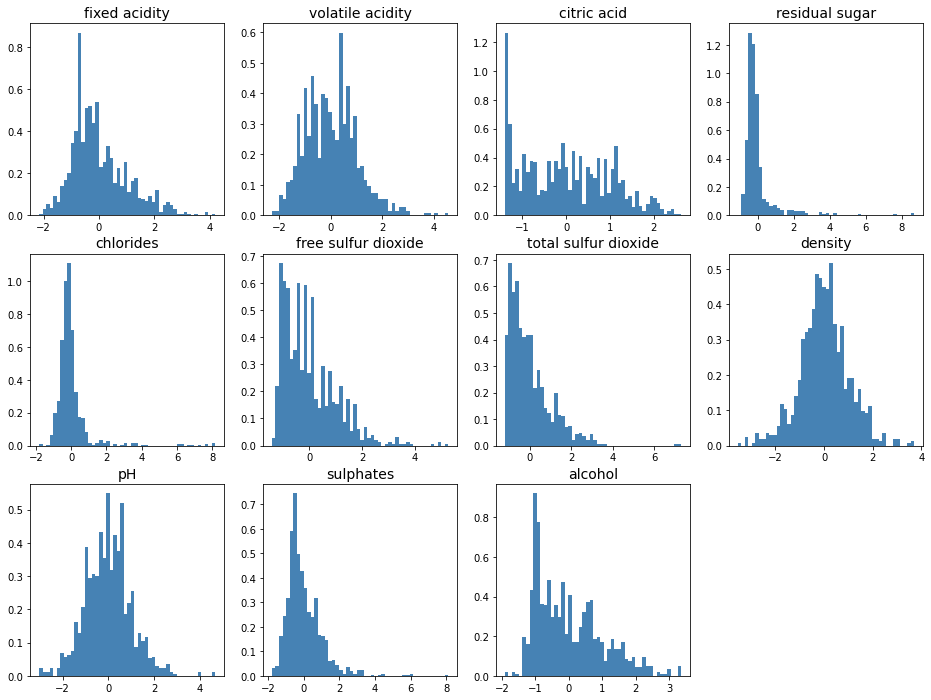

In [18]:
# visulaisation sur les données d'entrainement : valeur sur même échelle
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [19]:
# validation croisée pour trouver K
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 11}
Résultats de la validation croisée :
accuracy = 0.699 (+/-0.051) for {'n_neighbors': 3}
accuracy = 0.717 (+/-0.041) for {'n_neighbors': 5}
accuracy = 0.715 (+/-0.028) for {'n_neighbors': 7}
accuracy = 0.712 (+/-0.043) for {'n_neighbors': 9}
accuracy = 0.724 (+/-0.049) for {'n_neighbors': 11}
accuracy = 0.719 (+/-0.057) for {'n_neighbors': 13}
accuracy = 0.712 (+/-0.070) for {'n_neighbors': 15}


In [20]:
# evéluation du modèle sur le jeu de tests
# GridSearch a automatiquement réentrainé le modèle sur l'intégralité du jeu de
# tests
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.740


In [ ]:
# 73 % des jeux de tests sont bien classés
# La méthode de validation croisée est une méthode de recherche exhaustive 
# car on définit des valeurs que peuvent prendre les hyperparamètres puis 
# on teste toutes ces valeurs pour choisir celles qui nous convient le mieux

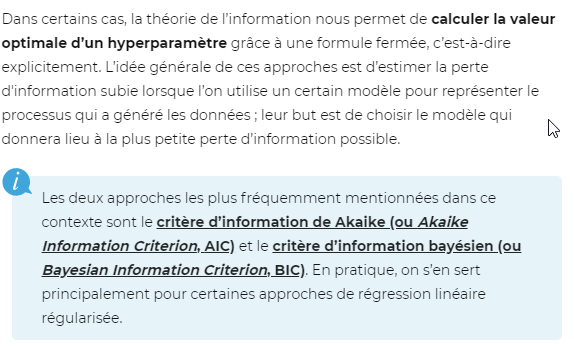

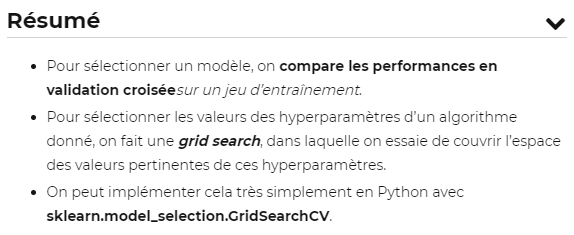

# <span class="bg-info">TP - IMPLEMENTER UNE VALIDATION CROISEE</span>

In [21]:
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-12-EVALUER_PERFORMANCES_MODELE_ML')

In [23]:
data = pd.read_csv('wine.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
# valeurs de travail
X = data[data.columns[:-1]].values
print(X.shape)
y = data['quality'].values
y = np.where(y < 6, 0, 1)
print(y.shape)

(1599, 11)
(1599,)


In [25]:
# split du jeu de données en TRAIN SET et TEST SET
# 30% des données dans le jeu de test)
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y_class, test_size=0.3) 

In [29]:
# standardisation des données
from sklearn import preprocessing
# on standardise
std_scale = preprocessing.StandardScaler().fit(X_train)
# on applique la standardisation sur le Train set
X_train_std = std_scale.transform(X_train)
# on applique la standardisation sur le Test set
X_test_std = std_scale.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

res = {'Meilleur hyperparametre': 0,
       'Meilleur pourcentage' : 0}

#  initialisation du modèle avec hyperparamètre entre 0 et 10
for i in range (1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    # entrainement du modèle
    model.fit(X_train_std, y_train)
    # évaluation du modèle
    # score = model.score(X_train_std, y_train)*100
    y_pred = model.predict(X_train_std)
    score = metrics.accuracy_score(y_train, y_pred)*100
    print(f'Score de hyperparametre {i} = {score}')
    if (score > res['Meilleur pourcentage']):
        res['Meilleur hyperparametre'] = i
        res['Meilleur pourcentage'] = score

param = res['Meilleur hyperparametre']
best_score = res['Meilleur pourcentage']

print(f'Meilleur paramètre : {param} - meilleur score {best_score}%')

Score de hyperparametre 1 = 100.0
Score de hyperparametre 2 = 87.2207327971403
Score de hyperparametre 3 = 85.88025022341377
Score de hyperparametre 4 = 82.66309204647007
Score de hyperparametre 5 = 80.6970509383378
Score de hyperparametre 6 = 79.44593386952636
Score de hyperparametre 7 = 79.08847184986595
Score de hyperparametre 8 = 79.08847184986595
Score de hyperparametre 9 = 78.55227882037534
Score de hyperparametre 10 = 78.10545129579982
Score de hyperparametre 11 = 77.1224307417337
Score de hyperparametre 12 = 77.03306523681859
Score de hyperparametre 13 = 75.60321715817693
Score de hyperparametre 14 = 76.13941018766755
Score de hyperparametre 15 = 75.33512064343164
Score de hyperparametre 16 = 75.42448614834673
Score de hyperparametre 17 = 75.51385165326184
Score de hyperparametre 18 = 75.60321715817693
Score de hyperparametre 19 = 74.97765862377122
Score de hyperparametre 20 = 75.42448614834673
Score de hyperparametre 21 = 74.70956210902592
Score de hyperparametre 22 = 75.33512

# <span class="bg-info">ALGORITHME CLASSIFICATION RETOURNE VALEURS BINAIRES</span>

# MODELE DE CLASSIFICATION BINAIRE

In [ ]:
# Modèle de classification binaire: prédire à quelle classe un objet appartient
# données étiquettées avec 0 ou 1 et le but de prédire l'appartenance à l'une
# ou l'autre des étiquettes

# MATRICE DE CONFUSION

In [ ]:
#  confusion de classe 

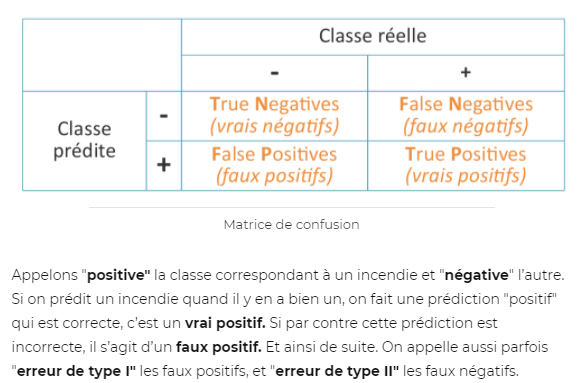

#  NOMBRE D'ERREURS

In [36]:
# Nombre d'erreurs = FP + FN 

In [38]:
# metrics.confusion_matrix(y_true, y_pred)

# RAPPEL - RECALL 
# OU  SENSIBILITE - SENSITIVITY -
#  OU TAUX DE VRAIS POSITIFS

In [ ]:
# = la proportion de positifs qu'on a correctement identifiés
# un rappel élevé (proche de 1) nous indique que notre modèle ne manque 
# d'identifier correctement qu'un faible nombre d'exemples positifs.
# ATTENTION : un modèle qui prédit systématiquement que tous les points 
# sont positifs va avoir Tn et FN égaux à 0 puisqu'aucun échantillon ne sera
# prédit négatif. Comme FN = 0 le rappel sera de 1.
# Tous les positifs ont été correctement identifiés mais on n'a pas appris 
# grand chose
# A l'inverse si on prédit très peu de positifs, par ex 1 seul, on a de grande
# chance que cette prédiction soit bonne ==> la précision vaut 1.
# On peut avoir 10000 positifs dans notre échantillon donc avoir une précision
# de 1 ne veut pas non plus dire que le modèle est très performant.
# donc compromis entre ces 2 scores en calculant leur moyenne harmonique :
# le F-measure

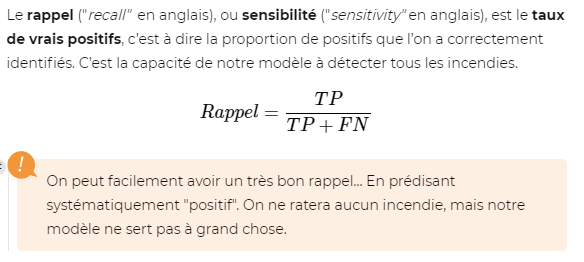

# PRECISION

In [ ]:
# = la proportion des précisions correctes parmi les points qu'on a prédits
#   positifs
# est_ce qu'on faisant des prédictions positives, on a fait beaucoup d'erreurs
# ou pas?
# 1 précision élevée indique que la plupart des échantillons positifs le sont
# effectivement (proche de 1)

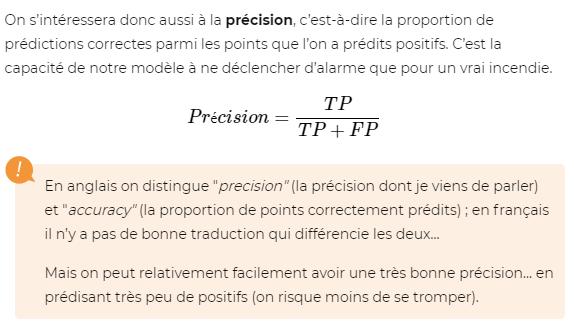

# F-MEASURE

In [ ]:
#  = un compromis entre le rappel et la précision, leur moyenne harmonique

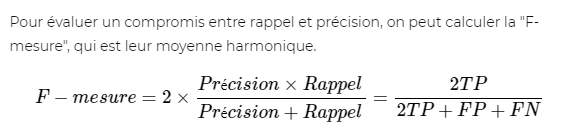

# SPECIFICITE

In [ ]:
# = le taux de vrais négatifs, nous indique la capacité a détécté correctement
#   les points négatifs

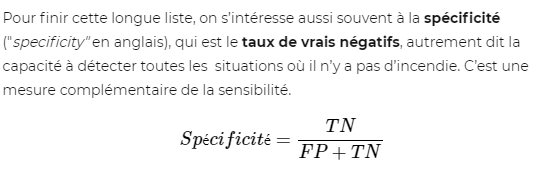

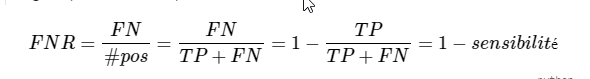

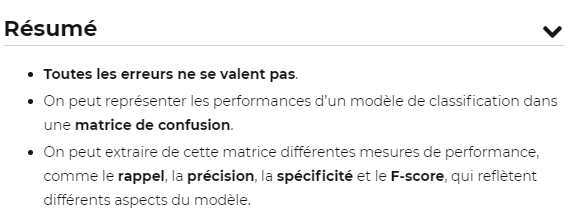

# <span class="bg-info">ALGORITHME DE CLASSIFICATION VALEURS REELLES </span>

# COURBE ROC

In [ ]:
# ROC, pour « Receiver-Operator Characteristic »
# en bas à gauche tous les points prédits négatifs
# en haut à droite tou les points prédits positifs

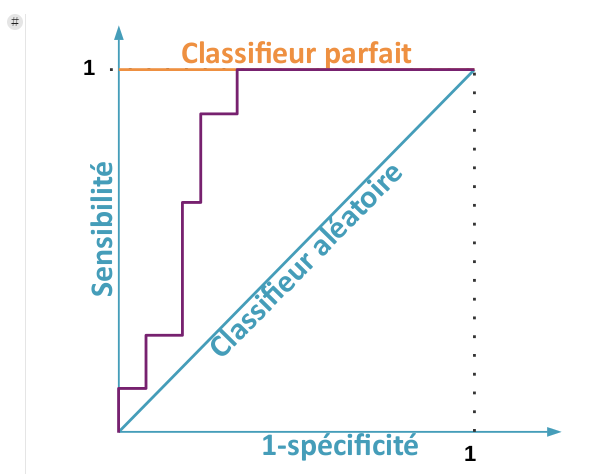

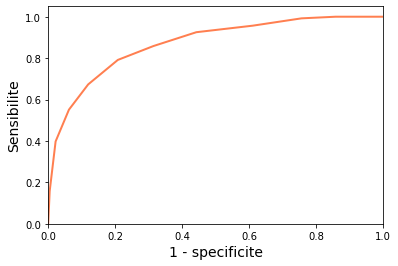

In [40]:
# exemple courbe ROC du KNN 
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
# fpr = spécificité - false positive rate
# tpr = rappel, sensibilité - true positive rate
# thr = thresholds 
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
plt.show()

# SEUIL

In [ ]:
# But choisir le seuil 
# on calcule pour chaque point la spécificite = TN / (FP +TN)
# et on calcule la précision TP / (TP + FN)
# puis on trace la courbe en abscisse spécificité et en ordonnée sensibilité 

# COURBE DE PRECISION RAPPEL 

In [ ]:
# OU PR-curve
# précision en ordonnée et rappel(sensibilité) en ordonnées

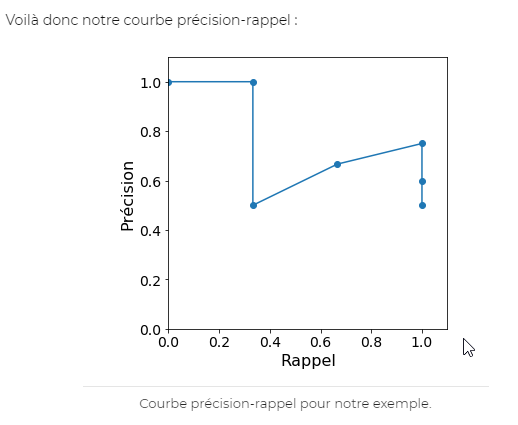

# COURBE LIFT

In [ ]:
# utilisée en marketing pour le ciblage

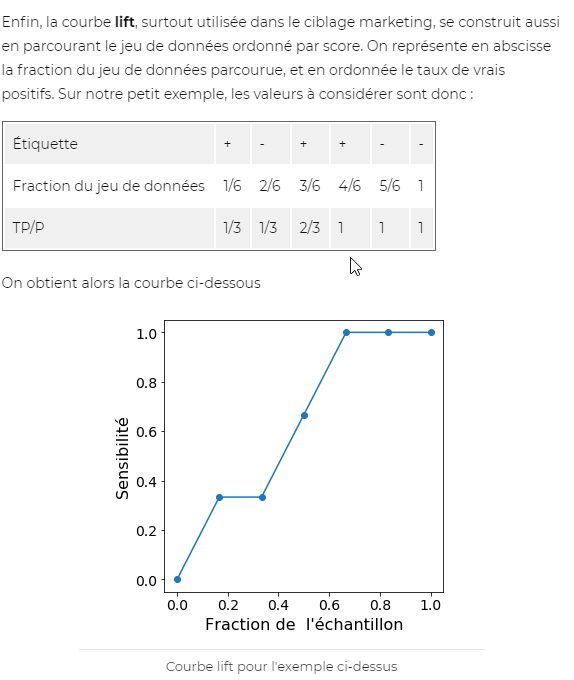

# AUROC

In [ ]:
#  AUROC = Area Under the ROC
# pour interpréter la courbe ROC, on va calculer l'aire sous la courve
# un classifieur parfait à un AUROC de 1
# un classifieur aléatoire à un AUROC de 0.5

In [41]:
print(metrics.auc(fpr, tpr))

0.8696432304369034


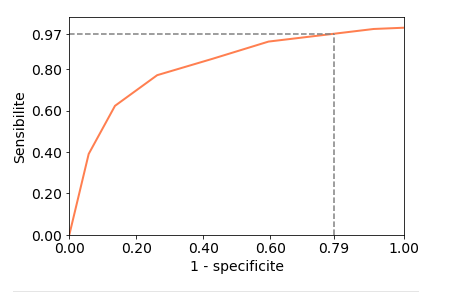

In [42]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

Sensibilité : 0.96
Spécificité : 0.39
Seuil : 0.36


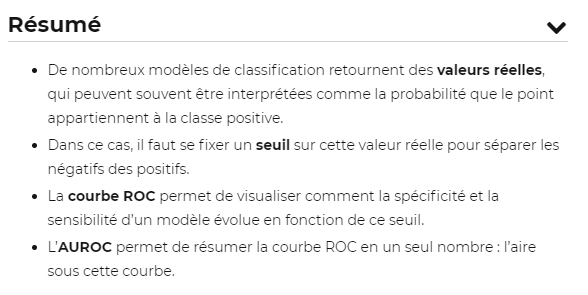

# <span class="bg-info">PERFORMANCE D'UN MODELE </span>

In [ ]:
# selon le AUC de 0.85 est-ce que le modèle a bien pris et est performant?
# Théorème de no lunch : tous les algorithmes ne fonctionne pas bien sur tous 
# les jeux de données.

# APPROCHES NAIVES

In [ ]:
# approches naïves : des approches très simples mais qui s'appuient néanmoins 
# sur le jeu de données pour construire un modèle. 
# Ces méthodes ne permettent pas réellement de faire de l'apprentissage, mais 
# servent de point de comparaison pour évaluer nos modèles.

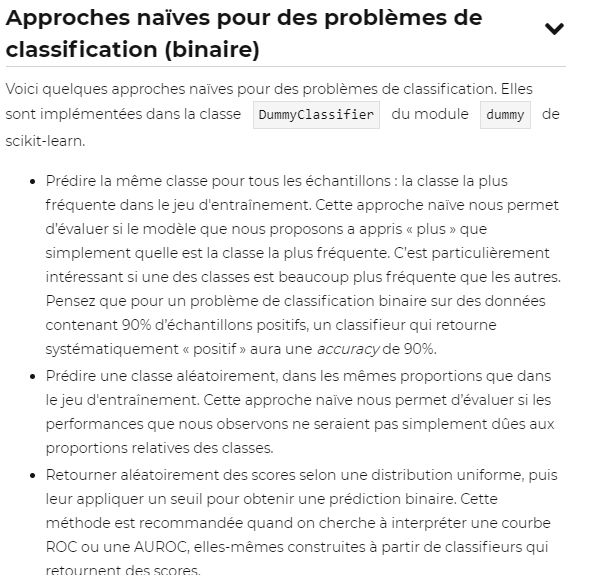

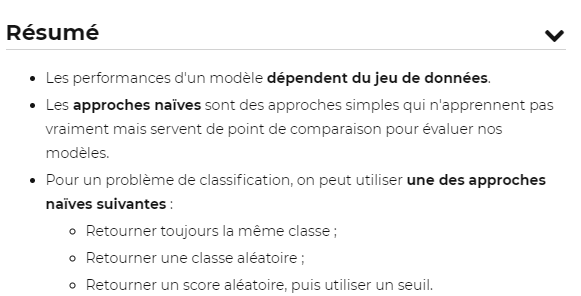

# <span class="bg-info">ALGORTIHME DE REGRESSION</span>

In [ ]:
# données étiquetées pour associer une valeur numérique à un objet

# MESURES D'ERREUR

# SOMME DES CARRES DES RESIDUS

In [ ]:
# calculer pour chaque point xi du jeu de test la distance entre son étiquette
# et la valeur prédite et en faire la somme. 
# Le résultat s'appelle la somme des carrés des résidus, ou RSS, 
# pour Residual Sum of Squares.
# Mais de plus en plus grande si le jeu de données est plus grand

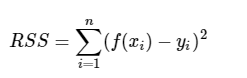

# ERREUR QUADRATIQUE MOYENNE

In [ ]:
#  Pour cette raison, nous allons la normaliser par le nombre n de points dans
# le jeu de test. 
# On obtient ainsi l'erreur quadratique moyenne, ou MSE, 
# pour Mean Squared Error.

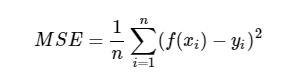

# ROOT MEAN SQUARED ERROR

In [ ]:
# Pour se ramener à l'unité de y , on peut prendre la racine de la MSE. 
# On obtient ainsi la RMSE, ou Root Mean Squared Error.
# sensible aux erreurs ex 100 sur une étiquette de 4 ==> log

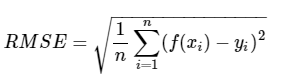

# ROOT MEAN SQUARED LOG ERROR

In [ ]:
# on peut passer les valeurs prédites et les vraies valeurs au log avant de 
# calculer la RMSE. 
# On obtient ainsi la RMSLE (Root Mean Squared Log Error) :

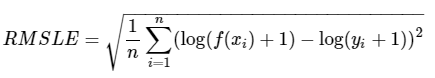

# COEFFICIENT DE DETERMINATION

In [ ]:
# premet de voir si les valeurs prédites sont corrélées avec les valeurs 
# réelles
# trés corrélée : R2 sera proche de 1 (x augmente, y augmente)
# très anti-corrélées : R2 proche de -1 (x augmente, y diminue)

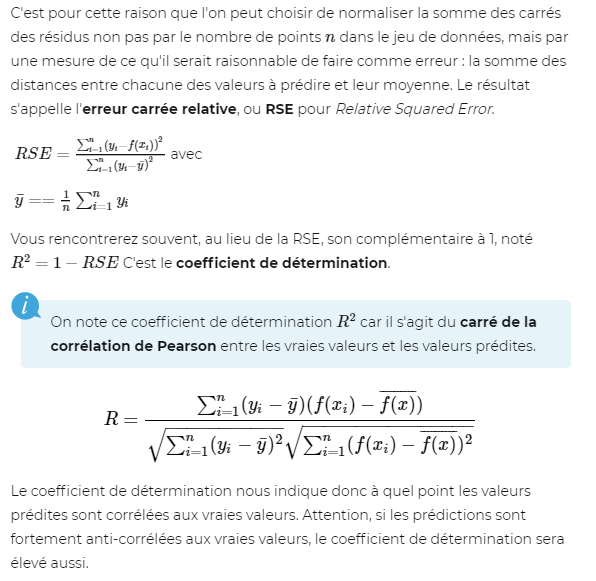

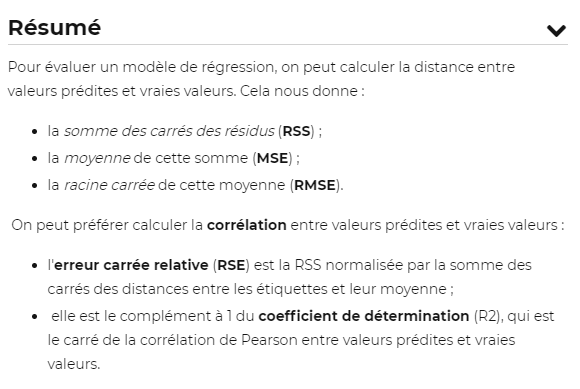

# <span class="bg-info">COMPARER ALGO A DES APPROCHES NAIVES</span>

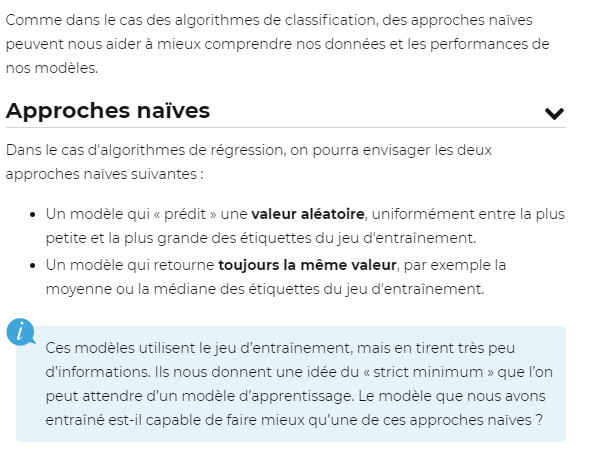

# <span class="bg-info">COMPARER ALGO A DES APPROCHES NAIVES</span>

In [ ]:
# Comme les étiquettes sont des nombres entiers, nous pouvons traiter la
# prédiction de la note de chaque vin à partir de ses caractéristiques
# physico-chimiques comme un problème de régression.

In [43]:
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-12-EVALUER_PERFORMANCES_MODELE_ML')

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('wine.csv', sep=";")

In [48]:
X = data[data.columns[:-1]].values
y = data['quality'].values

In [49]:
# découpage du jeu de données en Train set et Test set
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
# 30% des données dans le jeu de test

In [52]:
# standardisation des données
from sklearn import preprocessing
# entraine le scaler
std_scale = preprocessing.StandardScaler().fit(X_train)
# applique la standardisation au train set et test set
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [53]:
# modélisation
from sklearn import neighbors
# création du modèle
knn = neighbors.KNeighborsRegressor(n_neighbors=11)
# entrainement du modele
knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=11)

In [54]:
# prédiction des étiquettes sur notre jeu de test
y_pred = knn.predict(X_test_std)

In [55]:
# évaluation avec RMSE
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.64


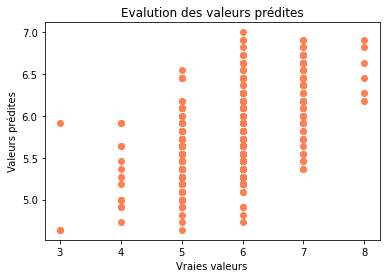

In [65]:
# visualisation
plt.scatter(y_test, y_pred, color='coral')
plt.gca().update(dict(title='Evalution des valeurs prédites',
                      xlabel='Vraies valeurs', ylabel='Valeurs prédites', 
                      ))
plt.show()

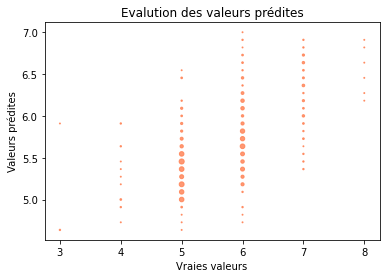

In [66]:
# Comme nos étiquettes prennent des valeurs entières entre 3 et 8, 
# nous avons beaucoup de points superposés aux même coordonnées.
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes[k] for k in keys], # taille du marqueur
        color='coral', alpha =0.8)
plt.gca().update(dict(title='Evalution des valeurs prédites',
                      xlabel='Vraies valeurs', ylabel='Valeurs prédites', 
                      ))
plt.show()

In [67]:
# pour comprendre le modèle, comparaison avec une première approche naîve
# , qui consiste à prédire des valeurs aléatoires, distribuées uniformément 
# entre les valeurs basse et haute des étiquettes du jeu de données 
# d'entraînement.
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

In [68]:
# évalutation du RMSE 
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))))
# supérieur à RMSE du KNN modèle donc notre modèle a mieux appris que modèle 
# naif aléatoire

RMSE : 1.72


In [69]:
# autre approche naive : Cependant, beaucoup de nos vins ont une note de 6, et
# beaucoup de nos prédictions sont autour de cette valeur. 
# Comparons maintenant notre modèle à un modèle aléatoire qui retourne 
# systématiquement la valeur moyenne des étiquettes du jeu de données 
# d'entraînement.
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test_std)

In [70]:
# Evaluation
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))
# supérieur au RMSE du KNN donc kNN a appris mieux que la moyenne des étiquettes

RMSE : 0.80


In [ ]:
# conclusion : l'algorithme des k plus proches voisins ne donne pas de très 
# bons modèles sur ce problème, mais a l'avantage d'être assez simple à 
# comprendre.

# <span class="bg-info">TP - MEAN SQUARED ERROR</span>

In [31]:
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-12-EVALUER_PERFORMANCES_MODELE_ML')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import *

In [33]:
data = pd.read_csv('wine-red.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
# valeurs de travail
X = data[data.columns[:-1]].values
y = data['quality'].values

In [36]:
X.shape

(1599, 11)

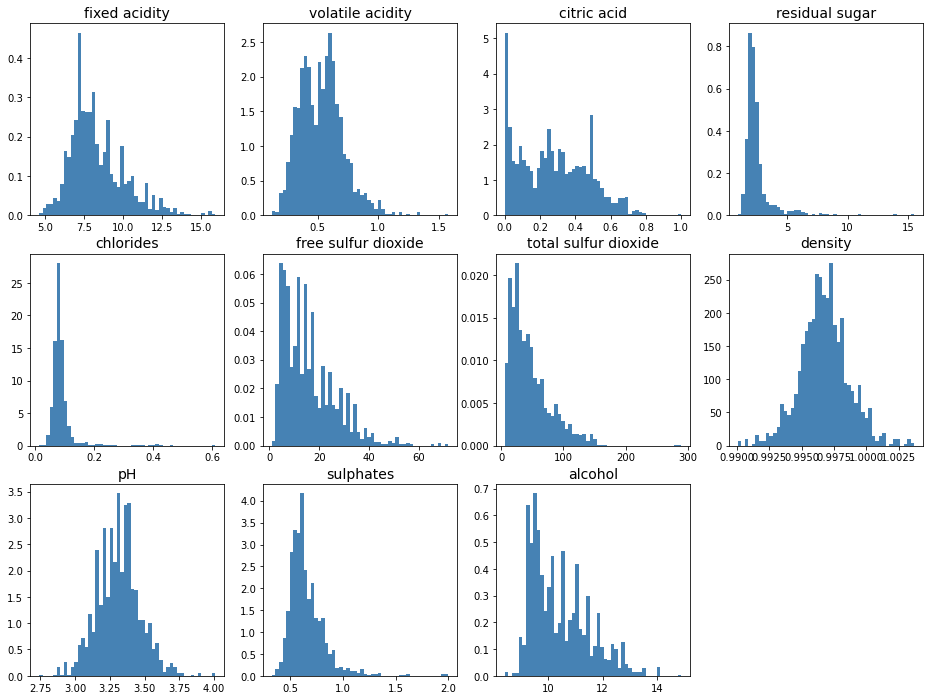

In [37]:
# histogramme des variables de X
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [38]:
# comme les unités ne sont pas les mêmes de 0  1 et de 0 et 300 
# donc il faut standardiser pour que les valeurs très grandes ne prennent
# pas le pas sur les très petites

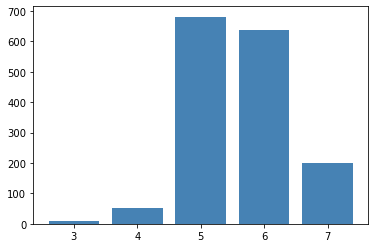

In [39]:
# Observation de la target y
absc = range(np.min(y), np.max(y))
b = plt.bar(absc, [(y ==a).sum() for a in absc], color='steelblue')

In [40]:
# split du jeu de données en TRAIN SET et TEST SET
# 30% des données dans le jeu de test)
# split du jeu de données en TRAIN SET et TEST SET
# 30% des données dans le jeu de test)
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y,test_size=0.3)

In [41]:
# standardisation des données
from sklearn import preprocessing
# on standardise
std_scale = preprocessing.StandardScaler().fit(X_train)
# on applique la standardisation sur le Train set
X_train_std = std_scale.transform(X_train)
# on applique la standardisation sur le Test set
X_test_std = std_scale.transform(X_test)

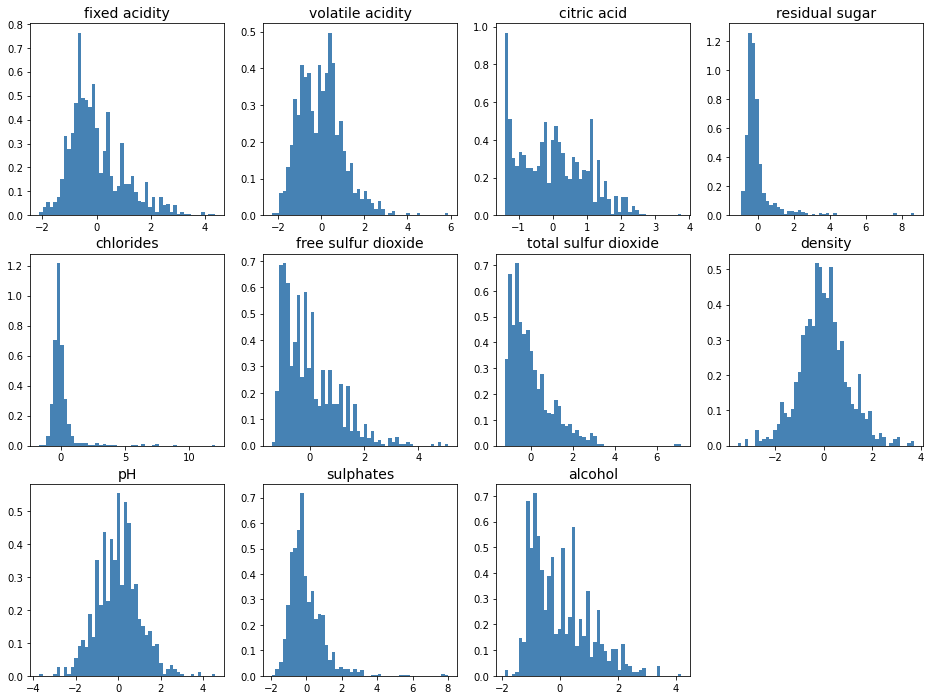

In [42]:
# visualisation sur les données d'entrainement : valeur sur même échelle
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [46]:
# validation croisée pour trouver K
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
# scorers = {
#     'r2': 'r2',
#     'rmsle': 'neg_mean_squared_log_error',
#     'rmse': 'neg_mean_squared_error'
# }
# score = 'accuracy'

scoring = ['r2','neg_mean_squared_log_error', 'neg_mean_squared_error']

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=scoring,   # score à optimiser
    refit='neg_mean_squared_error', 
    return_train_score=True,
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for rmsle, rmse, r2, params in zip(
        clf.cv_results_['mean_test_neg_mean_squared_log_error'], # mean_squared_log_error
        clf.cv_results_['mean_test_neg_mean_squared_error'], # mean_squared_log_error
        clf.cv_results_['mean_test_r2'],  # coeff R2
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        rmsle,
        rmse,
        r2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 13}
Résultats de la validation croisée :
-0.017822843724056965 = -0.731 (+/--0.070) for {'n_neighbors': 3}
-0.014691198452336657 = -0.622 (+/-0.089) for {'n_neighbors': 5}
-0.015038930191771693 = -0.641 (+/-0.061) for {'n_neighbors': 7}
-0.01464633006556362 = -0.620 (+/-0.091) for {'n_neighbors': 9}
-0.014333639496723519 = -0.609 (+/-0.108) for {'n_neighbors': 11}
-0.013649690351708963 = -0.580 (+/-0.150) for {'n_neighbors': 13}
-0.013779611760849353 = -0.585 (+/-0.142) for {'n_neighbors': 15}


In [48]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])